In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 
#  Dataset Description: 
# The dataset contains several features related to fetal monitoring, such as baseline values, accelerations, decelerations, and histogram metrics. The target variable fetal_health categorizes fetal health into three groups: 
# 1. Normal (1.0) 
# 2. Suspect (2.0) 
# 3. Pathological (3.0) 

# Attributes: 
- baseline value: Baseline fetal heart rate. 
- accelerations: Number of accelerations per second. 
- fetal_movement: Movements of the fetus. 
- uterine_contractions: Number of uterine contractions. 
- light_decelerations, severe_decelerations, prolongued_decelerations: Different types of decelerations. 
- histogram metrics: Metrics derived from the heart rate histogram, including mean, variance, mode, etc. 
- fetal_health: Target variable indicating fetal health. 

# Tasks: 

# Data Overview 

In [2]:
# 1. Load the dataset and display its structure (e.g., number of rows and columns, column names). 
df=pd.read_csv('fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
print('Number of rows-',df.shape[0])
print('Number of columns-',df.shape[1])

Number of rows- 2126
Number of columns- 22


In [4]:
print('Column names-')
df.columns

Column names-


Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [5]:
# 2. Identify and handle any missing values in the dataset.
df.isna().sum() #No missing values in the dataset

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [6]:
# Descriptive Analysis 
# 1. Provide statistical summaries for all numerical columns (mean, median, variance, etc.). 
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [7]:
# 2. Perform univariate bivariate and multivariate analysis 
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

<Axes: >

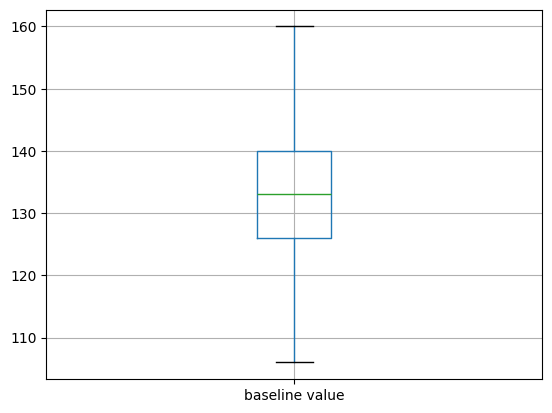

In [8]:
df.boxplot('baseline value')

In [9]:
# 3. Check for missing values and determine their distribution. #no missing values in the dataset.

# 4. Analyze the distribution of the target variable fetal_health. Create plots for various analysis. 

In [10]:
df['fetal_health'].unique()

array([2., 1., 3.])

In [11]:
df['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [12]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [14]:
# 5. Calculate the summary statistics for all numerical columns. 
# 6. Analyze the distribution of the target variable fetal_health. Visualize the counts of each category.

# 7. Compute and visualize the correlation matrix. Highlight the top three features with the strongest correlation with fetal_health. 

In [15]:
# Correlation and Feature Analysis 
# 4. Analyze the variance of key features (e.g., baseline value, uterine_contractions) to identify the most variable metrics. 
# 5. Plot the distribution of baseline value across each fetal_health category. 6. Identify features that have strong correlations with fetal_health. Visualize the correlation matrix. 
# 7. Explore relationships between key features, such as baseline value, accelerations, and uterine_contractions. Use scatter plots or other relevant charts. 
# Insights and Trends 
# 7. Calculate the average mean_value_of_short_term_variability for each fetal_health category. 
# 8. Compare the mean and median values of 
# percentage_of_time_with_abnormal_long_term_variability between normal and pathological cases. 
# 9. Examine the trend in uterine_contractions and prolongued_decelerations for different fetal health conditions. 
# 10. Examine the distribution of features such as baseline value and 
# mean_value_of_short_term_variability. Plot histograms for these columns. 11. Compare average values of important features (e.g., uterine_contractions, light_decelerations) across the different fetal health categories. 
# Outliers and Data Quality
# 10. Use boxplots to identify outliers in histogram_mean, baseline value, and histogram_variance. Discuss how these outliers might affect the analysis. 11. Identify the features with potential data quality issues or inconsistencies. 
# Visualizations 
# 12. Create a scatter plot to explore the relationship between accelerations and uterine_contractions, color-coded by fetal_health. 
# 13. Generate a pairplot to visualize the relationships among key features grouped by fetal_health. 
# 14. Plot histograms for baseline value and mean_value_of_short_term_variability to analyze their distributions. 
# 15. Identify outliers in columns like histogram_mean or baseline value using boxplots. 16. Investigate which features have the highest variability and their potential impact on fetal_health. 
# 17. Create a pairplot to show how features vary by fetal_health. 
# 18. Visualize the relationship between 
# percentage_of_time_with_abnormal_long_term_variability and the target variable using bar or line charts. 
# Classification Readiness 
# 15. Evaluate if the target variable fetal_health is balanced. If not, suggest approaches to handle imbalance for machine learning tasks. 
# 16. Highlight key features that might be most predictive of fetal health. 
# Outcome: 
# ● Develop a deeper understanding of the factors influencing fetal health. ● Identify significant trends, patterns, and relationships in the data. 
# ● Prepare the dataset for predictive modeling by highlighting relevant features and handling potential issues. 
# Deliverables: 
# 1. EDA Report: A detailed analysis of the dataset, including visualizations, summaries, and insights.
# Summarize your findings in a concise report, including key insights about fetal health. Propose actionable steps for further analysis or feature engineering based on your EDA. 
# Deliverables: 
# 1. A Jupyter Notebook or script with all your code and visualizations. 
# 2. A written report summarizing your key findings, supported by visuals. 3. Recommendations for preparing the dataset for predictive modeling, if applicable.